In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Set up data directory and categories
DATADIR = "/content/drive/MyDrive/data"
CATEGORIES = ["non-vehicles", "vehicles"]

# Load image data into list
data = []
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    files = os.listdir(path)
    random.shuffle(files)
    files = files[:1500]
    for img in files:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        data.append([img_array, class_num])


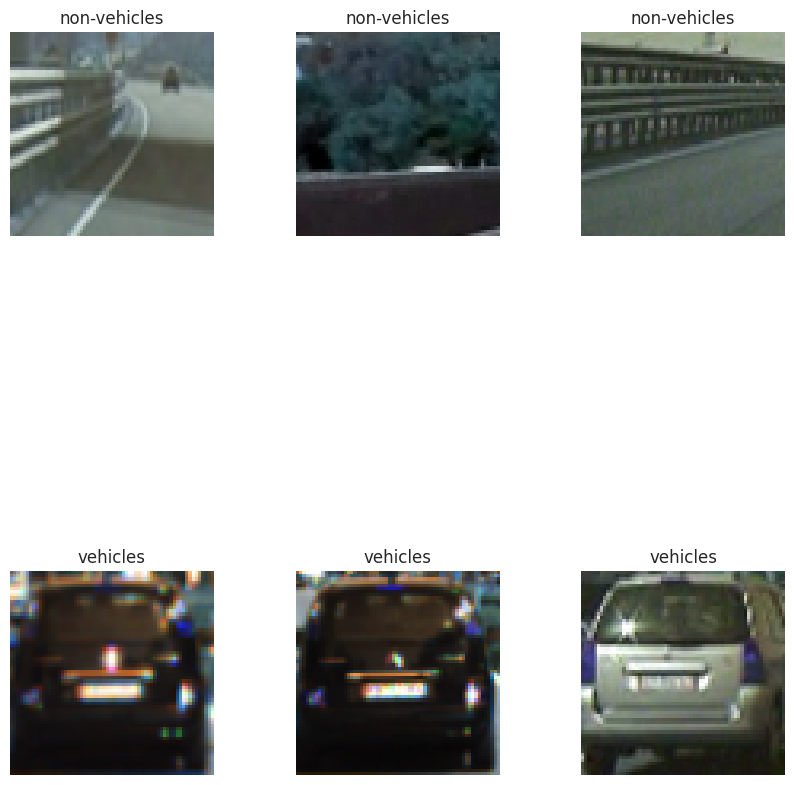

In [27]:
import random

# define the number of images to display per label
num_images = 3

# create an empty list to store the selected images
selected_images = []

# loop over each label
for label in range(len(CATEGORIES)):
    # get all images with the current label
    label_images = [image for image in data if image[1] == label]
    # randomly select num_images from the label_images
    selected_images.extend(random.sample(label_images, num_images))

# display the selected images
fig, axs = plt.subplots(len(CATEGORIES), num_images, figsize=(10, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.ravel()
for i, image in enumerate(selected_images):
    axs[i].imshow(image[0])
    axs[i].set_title(CATEGORIES[image[1]])
    axs[i].axis('off')
plt.show()


In [28]:
# Display the dimensions of the first 10 images in the dataset
for i in range(10):
    print(f"Image {i}: {data[i][0].shape}")

Image 0: (64, 64, 3)
Image 1: (64, 64, 3)
Image 2: (64, 64, 3)
Image 3: (64, 64, 3)
Image 4: (64, 64, 3)
Image 5: (64, 64, 3)
Image 6: (64, 64, 3)
Image 7: (64, 64, 3)
Image 8: (64, 64, 3)
Image 9: (64, 64, 3)


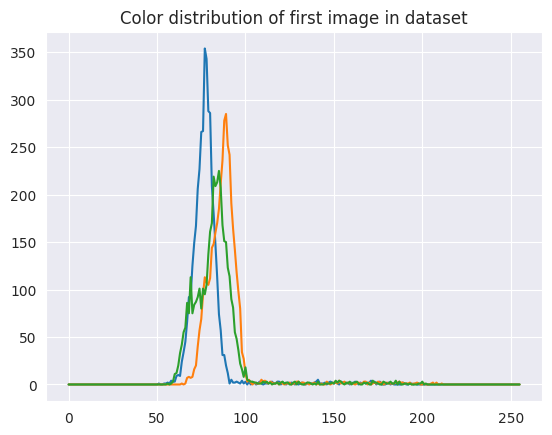

In [29]:
# Display the color distribution of the first image in the dataset
color_counts = np.zeros((256, 3))
for i in range(data[0][0].shape[0]):
    for j in range(data[0][0].shape[1]):
        pixel = data[0][0][i][j]
        color_counts[pixel[0]][0] += 1
        color_counts[pixel[1]][1] += 1
        color_counts[pixel[2]][2] += 1
plt.plot(color_counts)
plt.title("Color distribution of first image in dataset")
plt.show()

<ipython-input-30-46d9e1d476c8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label", data=df, palette="Set2")


Class 0: 1500 images
Class 1: 1500 images


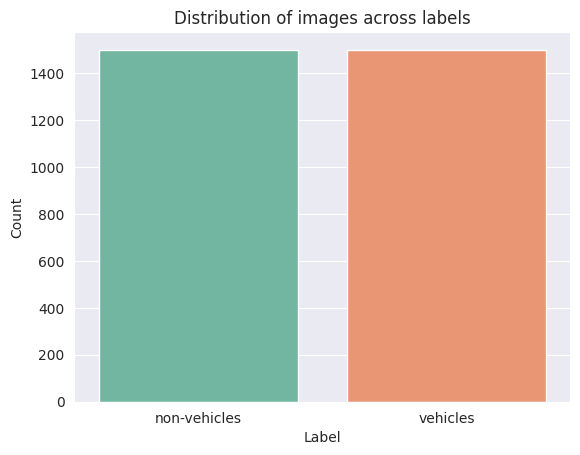

In [30]:
import pandas as pd
import seaborn as sns

# create a pandas DataFrame object from your list
df = pd.DataFrame(data, columns=["Image", "Label"])

# get the counts of images in each class
counts = df["Label"].value_counts()

sns.set_style("darkgrid")
sns.countplot(x="Label", data=df, palette="Set2")
plt.xticks(ticks=[0, 1], labels=CATEGORIES)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of images across labels")

# loop over the counts and print the number of images in each class
for i, count in enumerate(counts):
    print(f"Class {i}: {count} images")

plt.show()

<ipython-input-31-bce8fccc24aa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=0, data=df, palette="Set2")


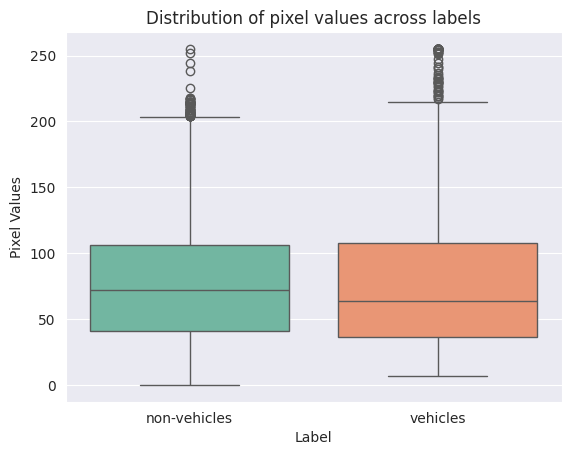

In [31]:
#BOX PLOT
image_data = np.array([i[0].flatten() for i in data])
label_data = np.array([CATEGORIES[i[1]] for i in data])

df = pd.DataFrame({"Label": label_data})
df = pd.concat([df, pd.DataFrame(image_data)], axis=1)

sns.boxplot(x="Label", y=0, data=df, palette="Set2")
plt.xlabel("Label")
plt.ylabel("Pixel Values")
plt.title("Distribution of pixel values across labels")
plt.show()

In [32]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Preprocess the dataset
X = []
y = []
for features, label in data:
    X.append(features.flatten())
    y.append(label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9033333333333333
Confusion Matrix for Logistic Regression:
[[269  24]
 [ 34 273]]


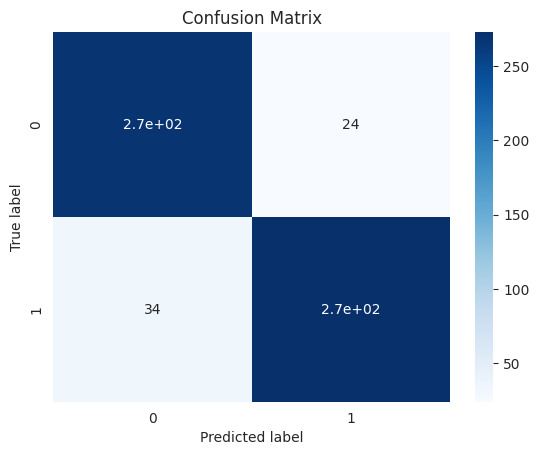

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# initialize logistic regression model and fit to training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# make predictions on test data and print accuracy and confusion matrix
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", lr.score(X_test, y_test))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))

# create confusion matrix heatmap
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_lr)
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

Decision Tree Accuracy: 0.8466666666666667
Confusion Matrix for Decision Tree:
[[241  52]
 [ 40 267]]


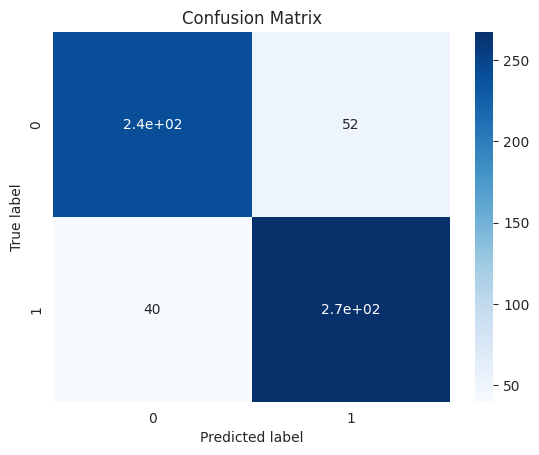

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# initialize decision tree model and fit to training data
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# make predictions on test data and print accuracy and confusion matrix
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", dt.score(X_test, y_test))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

# create confusion matrix heatmap
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_dt)
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

KNN Accuracy: 0.7666666666666667
Confusion Matrix for KNN:
[[293   0]
 [140 167]]


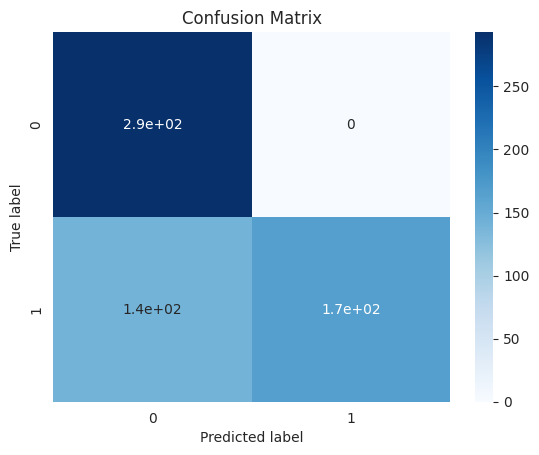

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# initialize KNN model and fit to training data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# make predictions on test data and print accuracy and confusion matrix
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", knn.score(X_test, y_test))
print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred_knn))

# create confusion matrix heatmap
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

SVM Accuracy: 0.96
Confusion Matrix for SVM:
[[284   9]
 [ 15 292]]


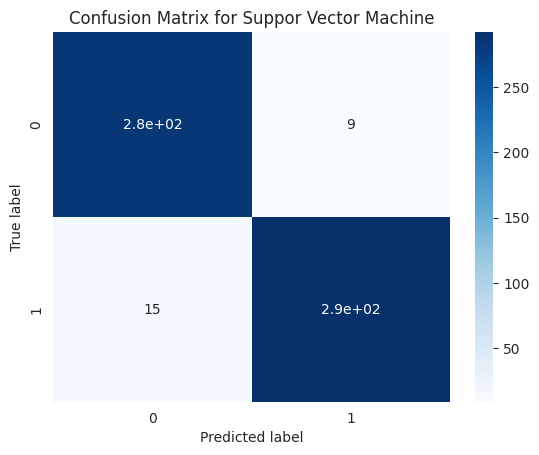

In [36]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", svm.score(X_test, y_test))
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

# Confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_svm)

# Plot confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for Suppor Vector Machine")
plt.show()


Random Forest Accuracy: 0.95
Confusion Matrix for Random Forest:
[[277  16]
 [ 14 293]]


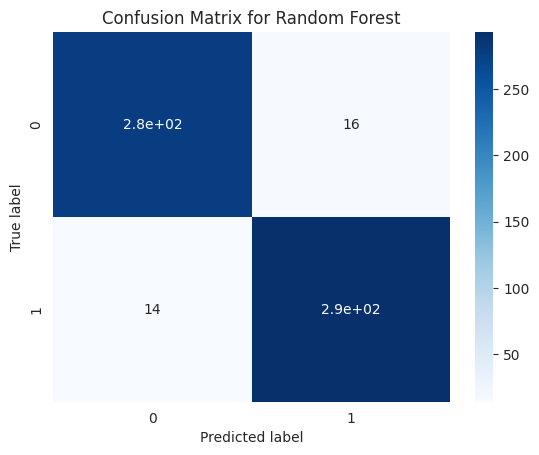

In [37]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", rf.score(X_test, y_test))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# Confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_rf)

# Plot confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for Random Forest")
plt.show()


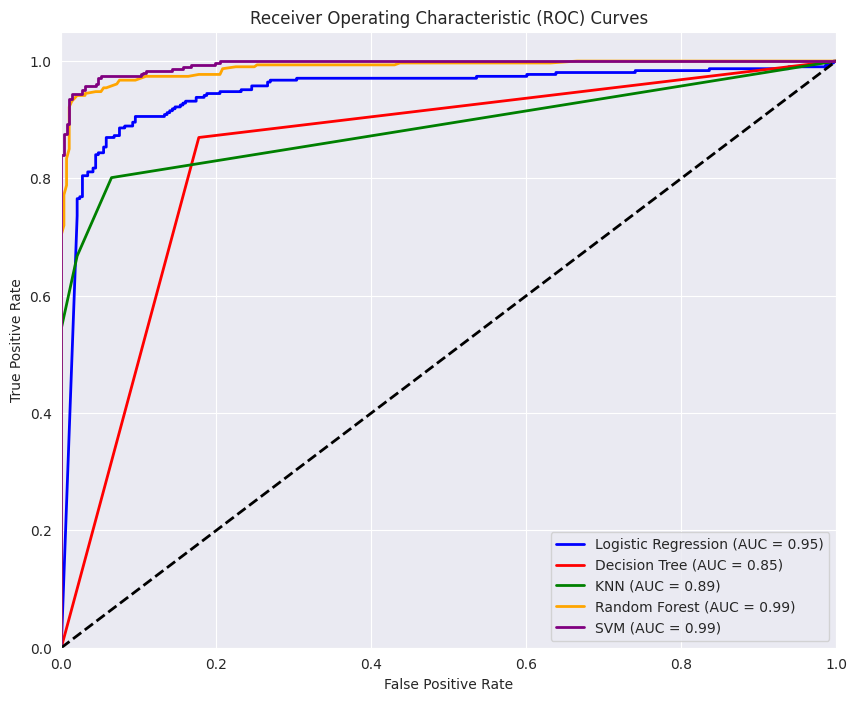

In [38]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression
y_pred_lr_prob = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr_prob)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Decision Tree
y_pred_dt_prob = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# KNN
y_pred_knn_prob = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Random Forest
y_pred_rf_prob = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# SVM
y_pred_svm_prob = svm.decision_function(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting the ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [39]:
print("Logistic Regression Accuracy:", lr.score(X_test, y_test))
print("Decision Tree Accuracy:", dt.score(X_test, y_test))
print("KNN Accuracy:", knn.score(X_test, y_test))
print("SVM Accuracy:", svm.score(X_test, y_test))
print("Random Forest Accuracy:", rf.score(X_test, y_test))

Logistic Regression Accuracy: 0.9033333333333333
Decision Tree Accuracy: 0.8466666666666667
KNN Accuracy: 0.7666666666666667
SVM Accuracy: 0.96
Random Forest Accuracy: 0.95


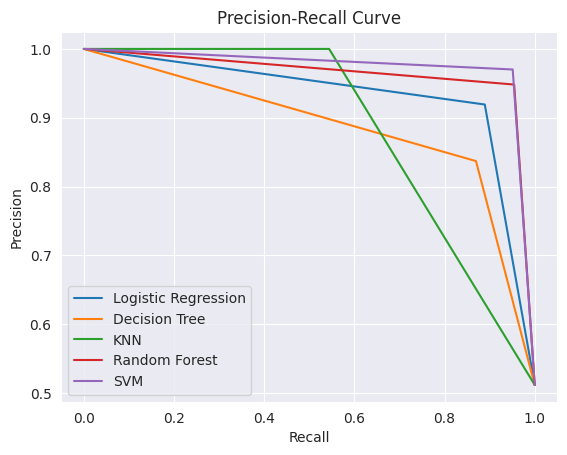

In [40]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

# Logistic Regression
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr)
plt.plot(recall, precision, label='Logistic Regression')

# Decision Tree
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_dt)
plt.plot(recall, precision, label='Decision Tree')

# KNN
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_knn)
plt.plot(recall, precision, label='KNN')

# Random Forest
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
plt.plot(recall, precision, label='Random Forest')

# SVM
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_svm)
plt.plot(recall, precision, label='SVM')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

MLP Accuracy: 0.9216666666666666
Confusion Matrix for MLP:
[[269  24]
 [ 23 284]]


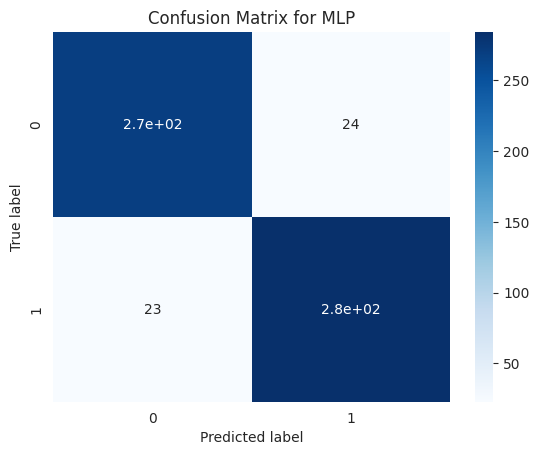

In [41]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier

# Multilayer Perceptron (MLP)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("MLP Accuracy:", mlp.score(X_test, y_test))
print("Confusion Matrix for MLP:")
print(confusion_matrix(y_test, y_pred_mlp))

# Create confusion matrix heatmap for MLP
conf_mat_mlp = confusion_matrix(y_true=y_test, y_pred=y_pred_mlp)
sns.heatmap(conf_mat_mlp, annot=True, cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for MLP")
plt.show()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 10, 10, 64)       

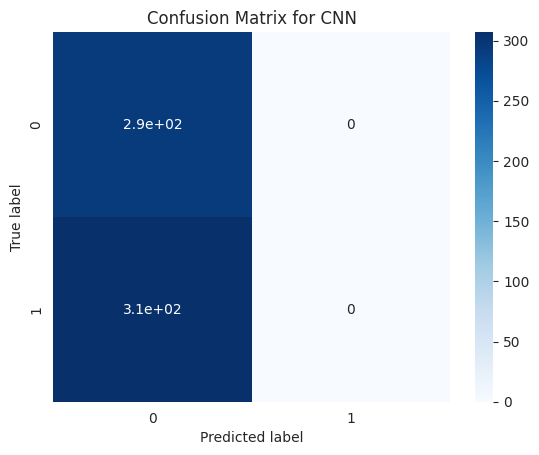

In [45]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape input data to include the channel dimension
X_train_cnn = X_train_cnn.reshape(-1, 100, 100, 1)
X_test_cnn = X_test_cnn.reshape(-1, 100, 100, 1)

# Define CNN architecture
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten layer
    layers.Flatten(),
    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 output classes: vehicles and non-vehicles
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_cnn, np.array(y_train), epochs=10, validation_data=(X_test_cnn, np.array(y_test)))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_cnn, np.array(y_test), verbose=2)
print('\nCNN Accuracy:', test_acc)

# Generate confusion matrix
y_pred_cnn = np.argmax(model.predict(X_test_cnn), axis=-1)
conf_mat_cnn = confusion_matrix(y_true=y_test, y_pred=y_pred_cnn)
sns.heatmap(conf_mat_cnn, annot=True, cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for CNN")
plt.show()


In [48]:
import numpy as np

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test))


Epoch 1/10
75/75 [==============================] - 40s 503ms/step - loss: 0.6933 - accuracy: 0.4908 - val_loss: 0.6932 - val_accuracy: 0.4883
Epoch 2/10
75/75 [==============================] - 39s 524ms/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.4883
Epoch 3/10
75/75 [==============================] - 38s 506ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6933 - val_accuracy: 0.4883
Epoch 4/10
75/75 [==============================] - 38s 510ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6934 - val_accuracy: 0.4883
Epoch 5/10
75/75 [==============================] - 40s 541ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6933 - val_accuracy: 0.4883
Epoch 6/10
75/75 [==============================] - 38s 514ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6933 - val_accuracy: 0.4883
Epoch 7/10
75/75 [==============================] - 39s 528ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6934 - val_accuracy: 0.4883

In [50]:
# Preprocess the data for MLP and CNN
# Assuming X_train_cnn, X_test_cnn, X_train_mlp, and X_test_mlp are the preprocessed data for CNN and MLP respectively

# MLP model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)  # Using the original training data
mlp_accuracy = mlp.score(X_test, y_test)
print("MLP Accuracy:", mlp_accuracy)

# CNN model
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape input data to include the channel dimension
X_train_cnn = X_train_cnn.reshape(-1, 100, 100, 1)
X_test_cnn = X_test_cnn.reshape(-1, 100, 100, 1)

# Define CNN architecture
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 output classes: vehicles and non-vehicles
])

# Compile the model
cnn_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test))

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print("CNN Accuracy:", cnn_accuracy)

# Display results for other models
print("Logistic Regression Accuracy:", lr.score(X_test, y_test))
print("Decision Tree Accuracy:", dt.score(X_test, y_test))
print("KNN Accuracy:", knn.score(X_test, y_test))
print("SVM Accuracy:", svm.score(X_test, y_test))
print("Random Forest Accuracy:", rf.score(X_test, y_test))


MLP Accuracy: 0.5116666666666667
Epoch 1/10
75/75 [==============================] - 41s 536ms/step - loss: 0.6938 - accuracy: 0.4804 - val_loss: 0.6932 - val_accuracy: 0.4883
Epoch 2/10
75/75 [==============================] - 47s 633ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6932 - val_accuracy: 0.4883
Epoch 3/10
75/75 [==============================] - 40s 541ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6932 - val_accuracy: 0.4883
Epoch 4/10
75/75 [==============================] - 37s 499ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6933 - val_accuracy: 0.4883
Epoch 5/10
75/75 [==============================] - 40s 533ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6932 - val_accuracy: 0.4883
Epoch 6/10
75/75 [==============================] - 38s 512ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6932 - val_accuracy: 0.4883
Epoch 7/10
75/75 [==============================] - 39s 516ms/step - loss: 0.6932 - accuracy: 0.5029 - val_lo

In [60]:
from sklearn.metrics import precision_recall_curve


In [61]:
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr.predict_proba(X_test)[:, 1])


In [62]:
# Assuming you have already imported the necessary libraries
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall values for Decision Tree
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt.predict_proba(X_test)[:, 1])


In [64]:
# Calculate precision and recall values for KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])


In [65]:
# Calculate precision and recall values for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])


In [66]:
# Calculate predicted probabilities for CNN
cnn_probs = cnn_model.predict(X_test_cnn)
cnn_probs_positive_class = cnn_probs[:, 1]  # Assuming 1 is the index for the positive class

# Calculate precision and recall values for CNN
cnn_precision, cnn_recall, _ = precision_recall_curve(y_test, cnn_probs_positive_class)


19/19 [==============================] - 4s 183ms/step


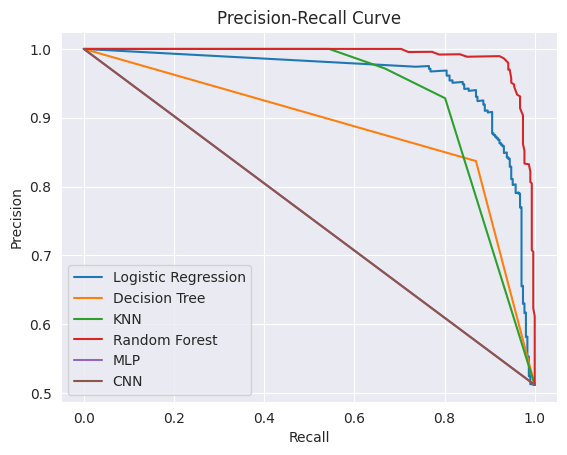

In [67]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Plot Precision-Recall curves for all models
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.plot(recall_knn, precision_knn, label='KNN')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(mlp_recall, mlp_precision, label='MLP')
plt.plot(cnn_recall, cnn_precision, label='CNN')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

